In [1]:
from lab1.runners import *
from lab1.benchmark import BenchmarkResult

In [2]:
def f(x: float, y: float) -> float:
    # return x ** 3 * y ** 5 * (4 - x - 7 * y)
    # return scipy.optimize.rosen((x, y))
    return (x - 1) ** 2 + y ** 2
    # return x ** 2 + y ** 2

    # TARGET = Vector(4 / 3, 20 / 63)


TARGET = Vector(1, 0)
PROBLEM = Oracle(f, TARGET)
b = BenchmarkResult.compare(RunnerMeta.runners, dict(
    o=PROBLEM,
    start=Vector(2, 1),
    a=Coef.CONST(0.0001),
    exit_condition=ExitCondition.NORM(Metric.EUCLID, 0.00001)
))

In [3]:
b.top("accuracy", "time", "queries")

sorted by accuracy
| name                            |   accuracy |   queries | time     |
|---------------------------------+------------+-----------+----------|
| CoordinateDescendImprovedRunner | 0.00000000 |       175 | 0.0007 с |
| CoordinateDescendRunner         | 0.00000000 |    140009 | 0.9254 с |
| CoordinateGradientRunner        | 0.00000011 |       133 | 0.0005 с |
| NelderMeadRunner                | 0.00446726 |        73 | 0.0020 с |
| GradientDescendRunner           | 0.04991037 |     83565 | 0.4827 с |

sorted by time
| name                            |   accuracy |   queries | time     |
|---------------------------------+------------+-----------+----------|
| CoordinateGradientRunner        | 0.00000011 |       133 | 0.0005 с |
| CoordinateDescendImprovedRunner | 0.00000000 |       175 | 0.0007 с |
| NelderMeadRunner                | 0.00446726 |        73 | 0.0020 с |
| GradientDescendRunner           | 0.04991037 |     83565 | 0.4827 с |
| CoordinateDescendRunner    

[[BenchmarkResult.ExperimentResult(name='CoordinateDescendRunner', accuracy=1.3267806428873114e-13, queries=140009, time=1.520688199903816), BenchmarkResult.ExperimentResult(name='GradientDescendRunner', accuracy=0.049910371802119054, queries=83565, time=0.6634873000439256), BenchmarkResult.ExperimentResult(name='CoordinateGradientRunner', accuracy=1.1470881471836218e-07, queries=133, time=0.0006772000342607498), BenchmarkResult.ExperimentResult(name='NelderMeadRunner', accuracy=0.0037292337261288036, queries=49, time=0.0012818999821320176), BenchmarkResult.ExperimentResult(name='CoordinateDescendImprovedRunner', accuracy=0.0, queries=175, time=0.0008236999856308103)], [BenchmarkResult.ExperimentResult(name='CoordinateDescendRunner', accuracy=1.62496778783787e-13, queries=270013, time=2.742275599972345), BenchmarkResult.ExperimentResult(name='GradientDescendRunner', accuracy=0.049900092698328305, queries=124082, time=0.7368900999426842), BenchmarkResult.ExperimentResult(name='Coordinat

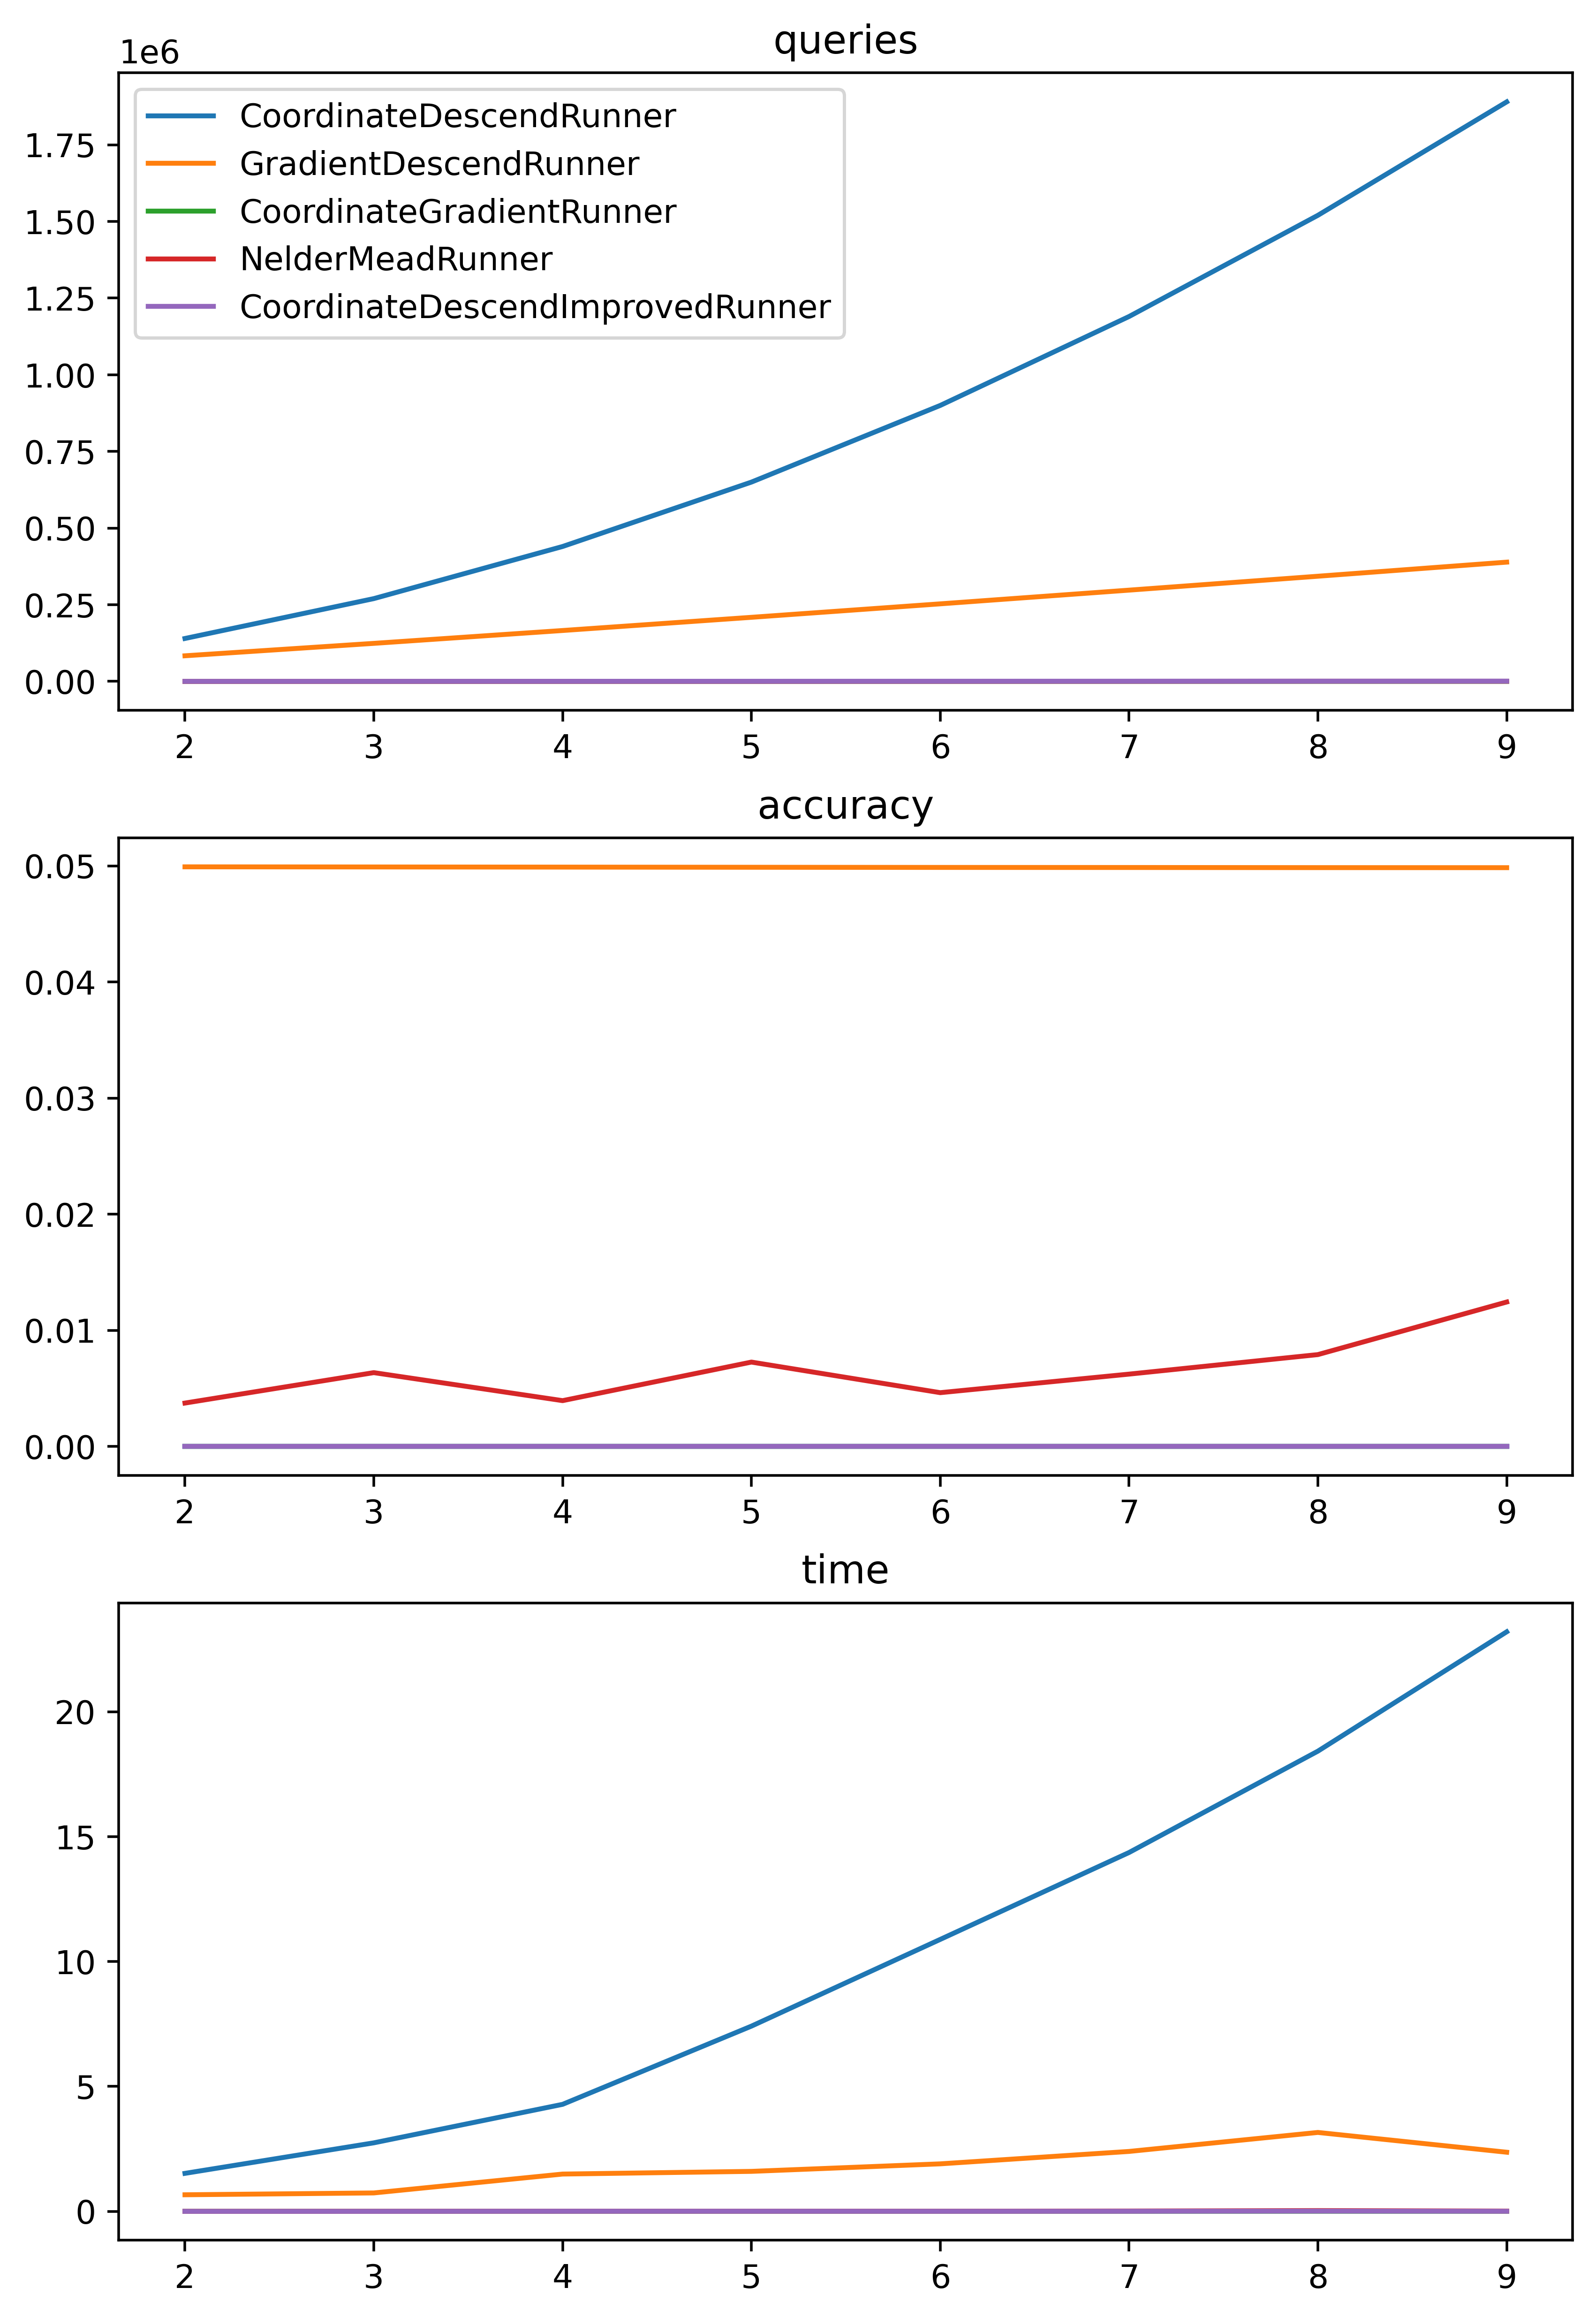

In [3]:
ns = range(2, 10)


params = []
for n in ns:
    def f(*args):
        return sum(map(lambda a: a ** 2, args))


    TARGET = Vector(*([0] * n))
    params.append(dict(
        o=Oracle(f, TARGET),
        start=Vector(*([1] * n)),
        a=Coef.CONST(0.0001),
        exit_condition=ExitCondition.NORM(Metric.EUCLID, 0.00001)
    ))
# (GradientDescendRunner, CoordinateGradientRunner)
bs = BenchmarkResult.series(RunnerMeta.runners, params)

BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, ns)))

[[BenchmarkResult.ExperimentResult(name='NelderMeadRunner', accuracy=0.0037292337261288036, queries=49, time=0.0017764000222086906), BenchmarkResult.ExperimentResult(name='GradientDescendRunner', accuracy=0.049910371802119054, queries=83565, time=0.8037072999868542)], [BenchmarkResult.ExperimentResult(name='NelderMeadRunner', accuracy=0.00634952840867899, queries=104, time=0.009648900013417006), BenchmarkResult.ExperimentResult(name='GradientDescendRunner', accuracy=0.049900092698328305, queries=124082, time=1.237189200008288)], [BenchmarkResult.ExperimentResult(name='NelderMeadRunner', accuracy=0.003937444185402701, queries=168, time=0.005226899986155331), BenchmarkResult.ExperimentResult(name='GradientDescendRunner', accuracy=0.04988802761724856, queries=166005, time=1.2867879000259563)], [BenchmarkResult.ExperimentResult(name='NelderMeadRunner', accuracy=0.007258554655262461, queries=217, time=0.004785900004208088), BenchmarkResult.ExperimentResult(name='GradientDescendRunner', accu

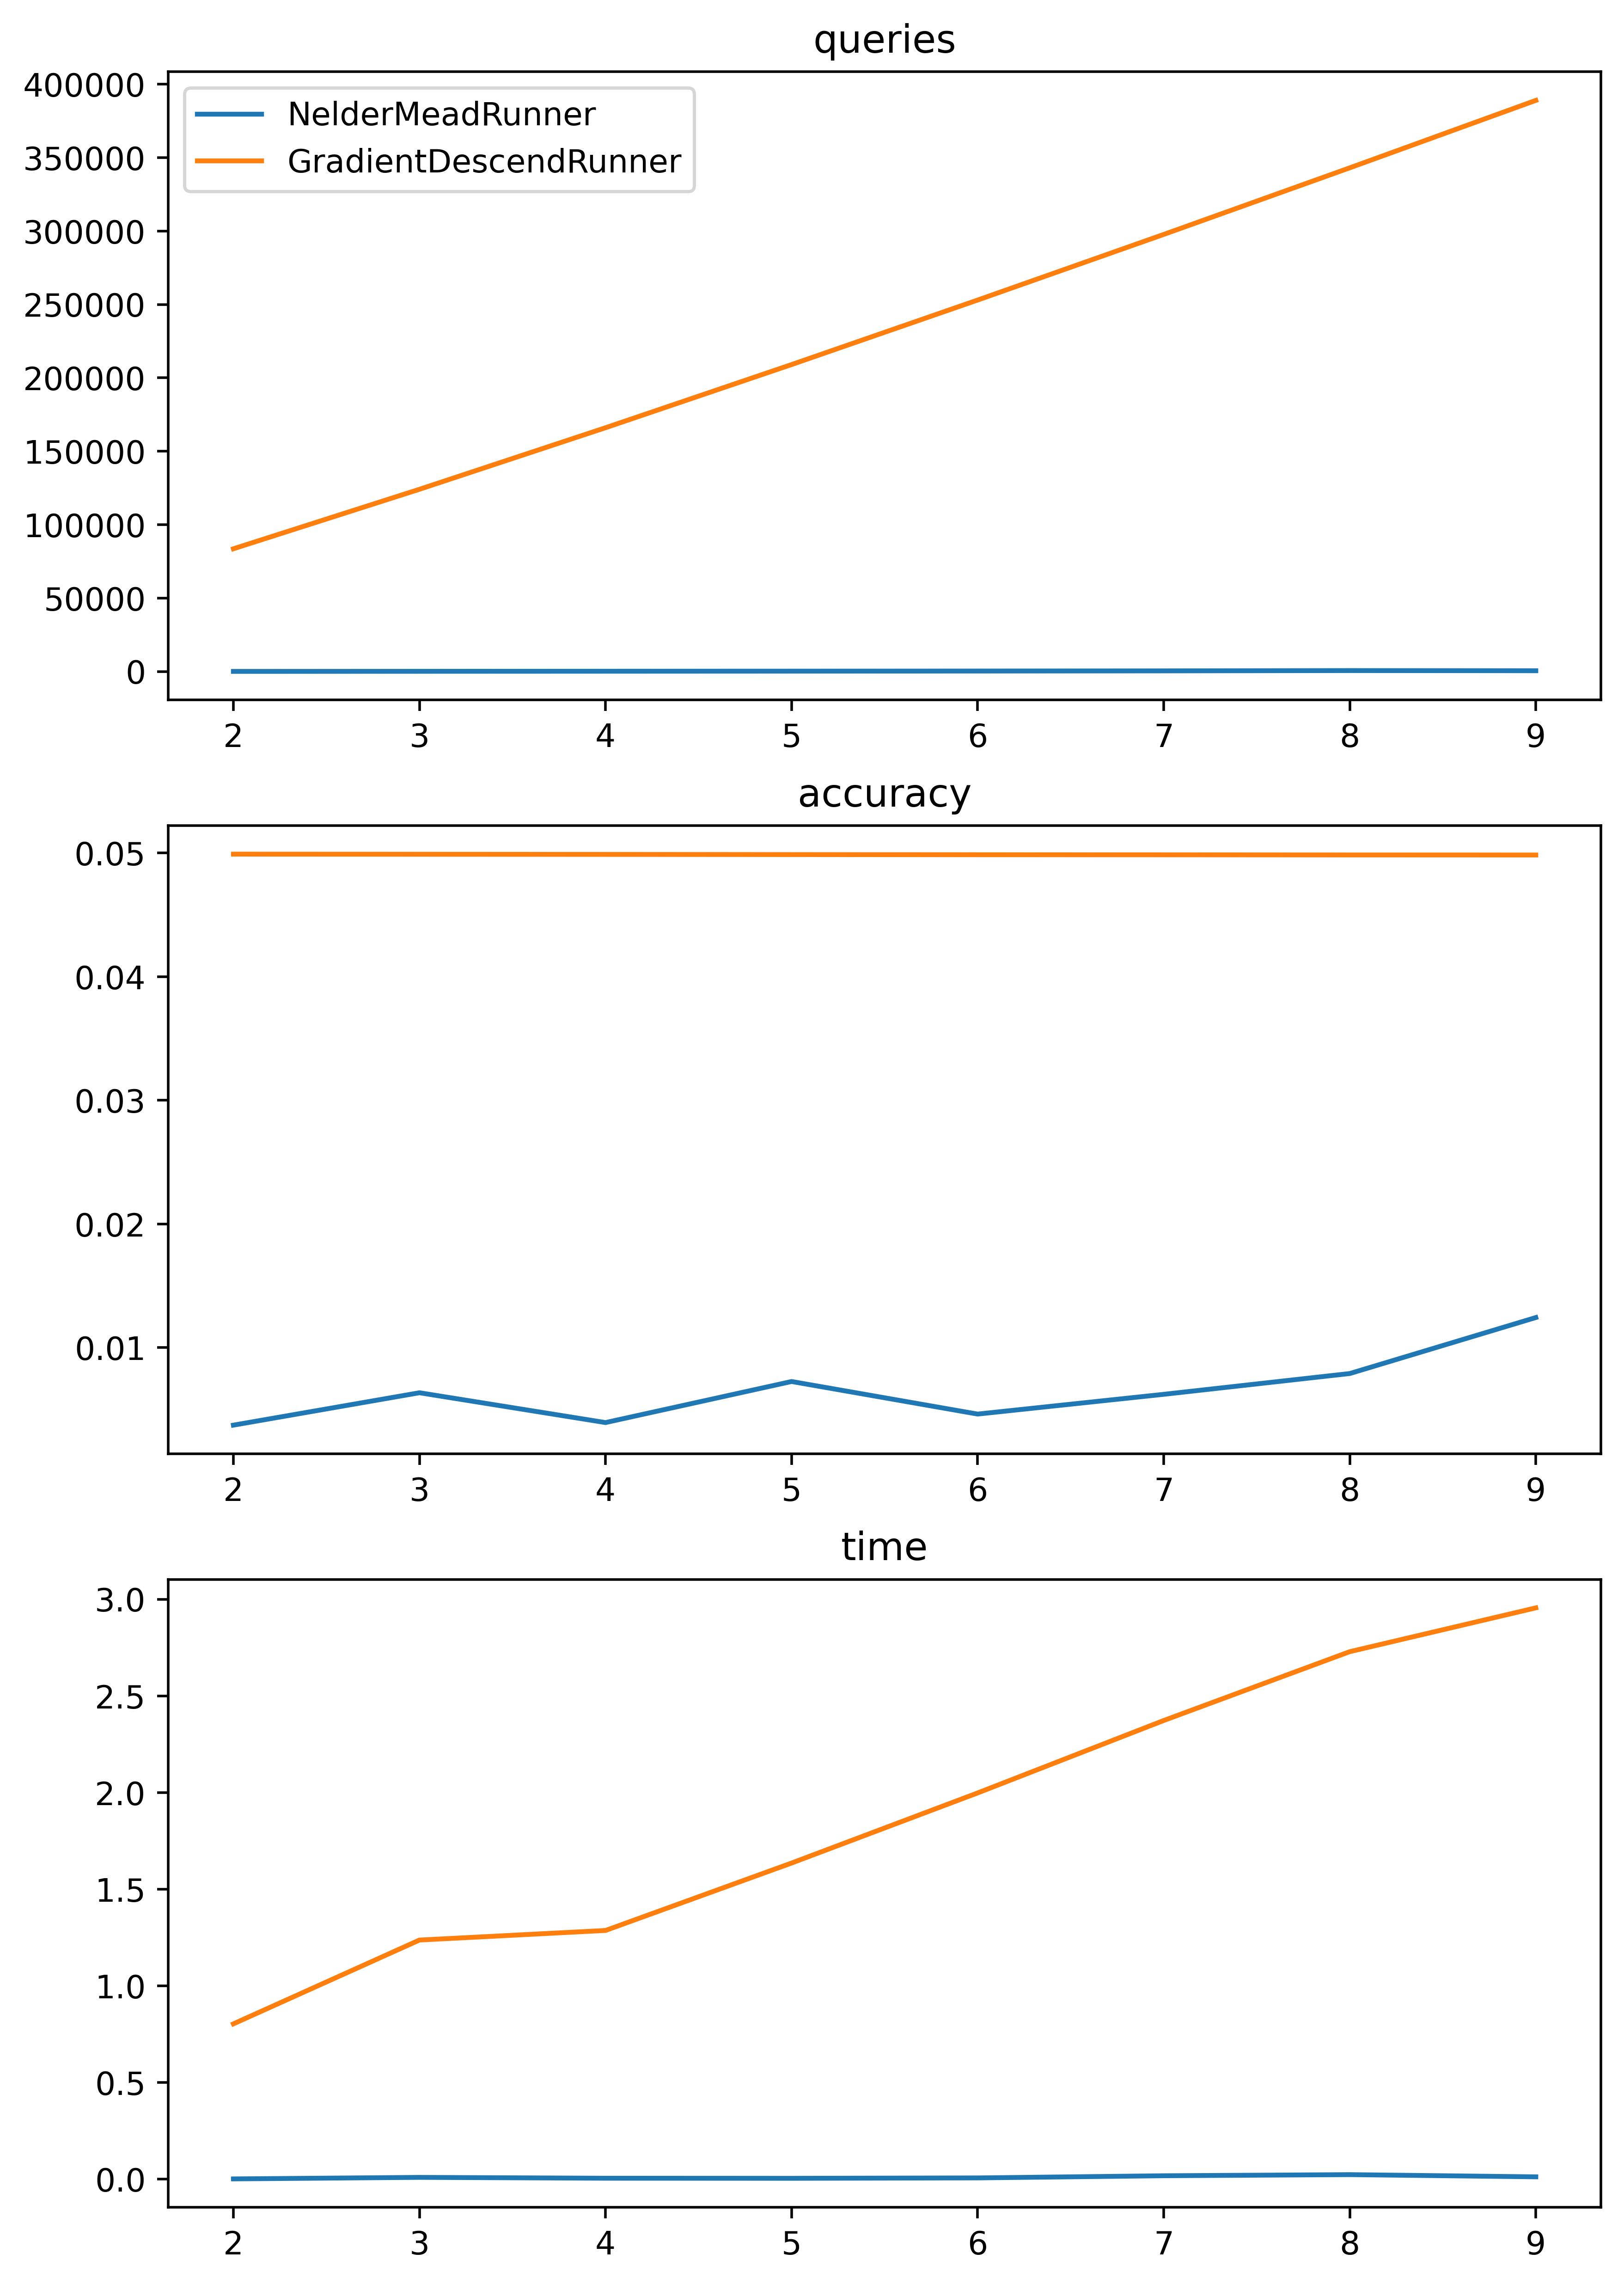

In [5]:
ns = range(2, 10)


params = []
for n in ns:
    def f(*args):
        return sum(map(lambda a: a ** 2, args))


    TARGET = Vector(*([0] * n))
    params.append(dict(
        o=Oracle(f, TARGET),
        start=Vector(*([1] * n)),
        a=Coef.CONST(0.0001),
        exit_condition=ExitCondition.NORM(Metric.EUCLID, 0.00001)
    ))
# (GradientDescendRunner, CoordinateGradientRunner)
bs = BenchmarkResult.series((NelderMeadRunner, GradientDescendRunner), params)

BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, ns)))